# Arbre de Décision

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/algorithms/decision-trees.ipynb)

Les arbres de décision sont des modèles d'apprentissage machine largement utilisés pour la classification et la régression. Ils représentent une structure arborescente où chaque nœud interne représente une décision basée sur une caractéristique particulière, tandis que les feuilles du arbre représentent les prédictions finales. Les arbres sont construits en choisissant séquentiellement la meilleure caractéristique pour diviser les données en sous-ensembles homogènes.

L'algorithme commence par le nœud racine, qui contient l'ensemble des données d'entraînement. À chaque étape, il sélectionne la caractéristique qui maximise la séparation entre les classes ou minimise l'erreur de régression. Cette division récursive se poursuit jusqu'à ce qu'un critère d'arrêt soit atteint, tel qu'une profondeur maximale ou une pureté suffisante des nœuds.

Les arbres de décision sont attractifs en raison de leur interprétabilité, car ils permettent de comprendre facilement les décisions prises par le modèle. Cependant, ils ont tendance à être sujets au surajustement, ce qui peut être atténué en utilisant des techniques comme la taille maximale de l'arbre, l'élagage ou l'utilisation d'ensembles d'arbres (comme les forêts aléatoires). En résumé, les arbres de décision sont des outils puissants et polyvalents de l'apprentissage machine, adaptés à de nombreuses tâches, de la classification à la régression, en passant par la prise de décision.

[![Wikipedia](https://img.shields.io/badge/Wikipedia-lightgrey)](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [1]:
# Supprimer les commentaires pour installer
# !pip3 install -q -U scikit-learn
# !pip3 install -q -U matplotlib
# !pip3 install -q -U mlxtend

## Données

Création d'un jeu de données synthétiques:

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

random_state=123

# Créer les données
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    class_sep=.9,
    random_state=random_state,
)

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Vérifier les dimensions (division 80%-20%)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(400, 2) (100, 2) (400,) (100,)


Visualisation:

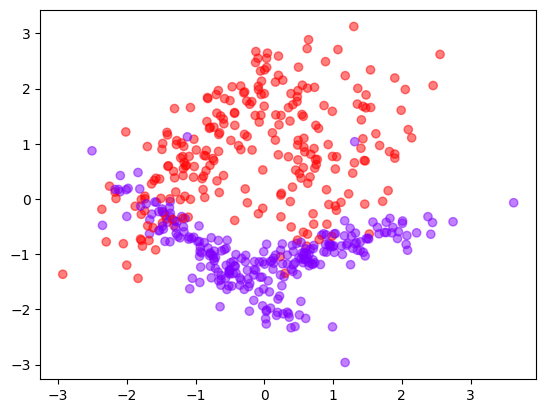

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.scatter(X[:,0], X[:,1], alpha=0.5, c=y, cmap='rainbow')

## Arbre de Décision avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(max_depth=3, random_state=random_state)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Précision de l'Entraînement:", accuracy_score(y_train, clf.predict(X_train)))
print("Précision du Test:", accuracy_score(y_test, y_pred))

Précision de l'Entraînement: 0.925
Précision du Test: 0.86


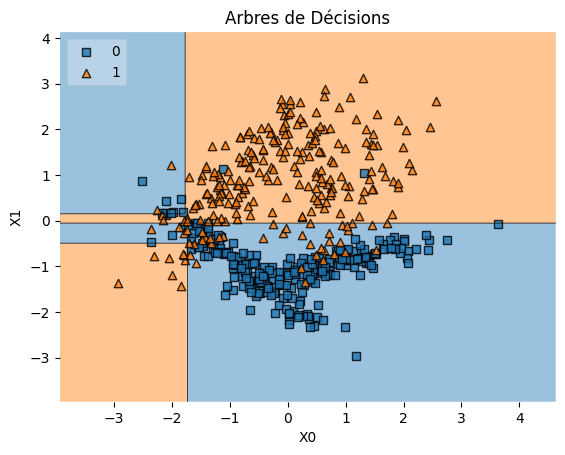

In [5]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X, y, clf=clf, legend=2) # X_highlight=X_test)
plt.xlabel('X0')
plt.ylabel('X1')
plt.title('Arbres de Décisions')
plt.show()

## Interprétabilité

[Text(0.5, 0.875, 'x[1] <= -0.051\ngini = 0.499\nsamples = 400\nvalue = [208, 192]'),
 Text(0.25, 0.625, 'x[1] <= -0.486\ngini = 0.24\nsamples = 230\nvalue = [198, 32]'),
 Text(0.125, 0.375, 'x[0] <= -1.722\ngini = 0.139\nsamples = 187\nvalue = [173.0, 14.0]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.1875, 0.125, 'gini = 0.084\nsamples = 181\nvalue = [173, 8]'),
 Text(0.375, 0.375, 'x[0] <= 1.521\ngini = 0.487\nsamples = 43\nvalue = [25, 18]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 36\nvalue = [18, 18]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.625, 'x[0] <= -1.774\ngini = 0.111\nsamples = 170\nvalue = [10, 160]'),
 Text(0.625, 0.375, 'x[1] <= 0.146\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6875, 0.125, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.875, 0.375, 'x[0] <= 1.313\ngini = 0.025\nsamples = 158\nvalue = [2, 156]'),


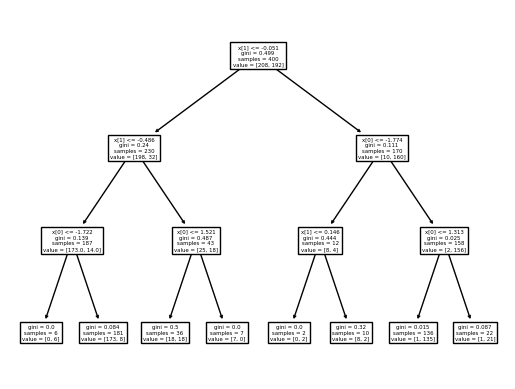

In [6]:
from sklearn.tree import plot_tree

plot_tree(clf)